# Driver Drowsiness Detection System

In [1]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
!pip install opencv-python

### Importing the dependencies

In [1]:
import torch
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

#### loaded the model yolov5

In [2]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-3 Python-3.10.9 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


#### Trying out the model using some random image

In [3]:
sample_image = 'https://m.economictimes.com/thumb/height-450,width-600,imgsize-252301,msid-65666231/delhi-traffic.jpg'

In [4]:
results = model(sample_image)
results.print()

image 1/1: 450x600 1 person, 25 cars, 2 buss, 2 trucks
Speed: 622.5ms pre-process, 203.9ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


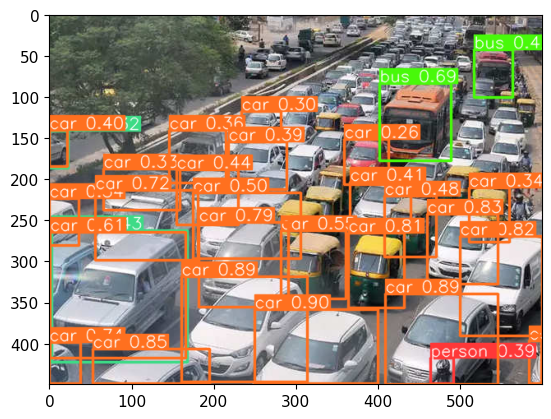

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

#### Real Time Detection

In [6]:
# we can pass in the arguement instead of 0 to input any kind of path of video
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections passing the frame to the models
    results = model(frame)
    
    
    # results.render() gives all the array respresentation of the images
    cv2.imshow('DDDS', np.squeeze(results.render()))
    
    # use to close the opened window
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Training From Scratch (The Driver Drowsiness detection System)

In [7]:
import uuid # Unique Identifier
import time

#### Setting up the directories and creating the datasets

In [8]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_images = 25

In [12]:
capture2 = cv2.VideoCapture(0)

# Looping through the labels
for label in labels:
    print('Collecting images for {}'.format(labels))
    time.sleep(5)
    
    # Looping through the image range
    for num_img in range(number_images):
        print('collecting images for {}, image number {}'.format(label, num_img))
        
        # Webcam feed
        ret, frame = capture2.read()
        
        # Creating an unique name for the image
        img_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file
        cv2.imwrite(img_name, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 sec delay between the captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
capture2.release()
cv2.destroyAllWindows()

collecting images for awake, image number 0
collecting images for awake, image number 1
collecting images for awake, image number 2
collecting images for awake, image number 3
collecting images for awake, image number 4
collecting images for awake, image number 5
collecting images for awake, image number 6
collecting images for awake, image number 7
collecting images for awake, image number 8
collecting images for awake, image number 9
collecting images for awake, image number 10
collecting images for awake, image number 11
collecting images for awake, image number 12
collecting images for awake, image number 13
collecting images for awake, image number 14
collecting images for awake, image number 15
collecting images for awake, image number 16
collecting images for awake, image number 17
collecting images for awake, image number 18
collecting images for awake, image number 19
collecting images for awake, image number 20
collecting images for awake, image number 21
collecting images fo

In [14]:
!git clone https://github.com/heartexlabs/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [15]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 6.8/6.8 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 MB 1.4 MB/s eta 0:00:00
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.7
    Uninstalling PyQt5-5.15.7:
      Successfully uninstalled PyQt5-5.15.7
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\~xml\\etree.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [20]:
# !pip install pyqt5 lxml --upgrade
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [23]:
!cd yolov5 && python train.py --img 320 --batch 8 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=8, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-133-gcca5e21 Python-3.10.9 torch-2.0.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, s


### Loading The Model DDDS

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ASUS/.cache\torch\hub\master.zip
YOLOv5  2023-4-4 Python-3.10.9 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [3]:
img = os.path.join('data', 'images', 'IMG20201208102322.jpg')

# img = 'https://media.istockphoto.com/id/184618573/photo/a-tired-man-wearing-a-blue-top-is-yawning.jpg?s=612x612&w=0&k=20&c=GJ0CaKL3e2VmbgbcBBpaFIVU1FQcYVrDuO8Z1yyP4bM='

In [4]:
results = model(img)
results.print()

image 1/1: 1440x1080 1 awake
Speed: 67.4ms pre-process, 197.4ms inference, 15.6ms NMS per image at shape (1, 3, 640, 480)


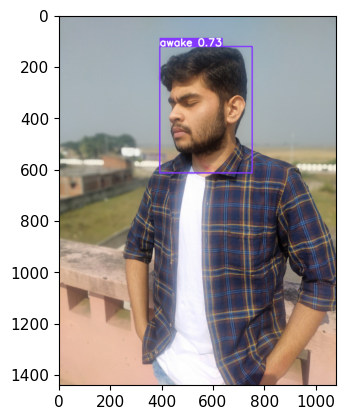

In [5]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('DDDS', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()